Rossman Store Sales Analysis

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import os
import opendatasets as od

In [4]:
od.download('https://www.kaggle.com/competitions/rossmann-store-sales/data')

100%|██████████| 6.99M/6.99M [00:00<00:00, 83.9MB/s]


Extracting archive ./rossmann-store-sales/rossmann-store-sales.zip to ./rossmann-store-sales


In here we have 4 dataset

In [5]:
os.listdir('rossmann-store-sales')

['sample_submission.csv', 'store.csv', 'train.csv', 'test.csv']

In [6]:
ross_df=pd.read_csv('/content/rossmann-store-sales/train.csv')
ross_df.head()

<ipython-input-6-674e06f25403>:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  ross_df=pd.read_csv('/content/rossmann-store-sales/train.csv')


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [7]:
sns.set_style('darkgrid')
sns.set_palette('viridis')

In [8]:
ross_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [9]:
store_df=pd.read_csv('/content/rossmann-store-sales/store.csv')
store_df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


#Merging dataframes

To get better features to work upon and corellations

In [10]:
merged_df=ross_df.merge(store_df,how='left',on='Store')
merged_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1017205,1112,2,2013-01-01,0,0,0,0,a,1,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1017206,1113,2,2013-01-01,0,0,0,0,a,1,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1017207,1114,2,2013-01-01,0,0,0,0,a,1,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [11]:
merged_df.shape

(1017209, 18)

In [12]:
test_df=pd.read_csv('/content/rossmann-store-sales/test.csv')
test_df.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0


In [13]:
merged_test_df=test_df.merge(store_df,how='left',on='Store')
merged_test_df

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,1,4,2015-09-17,1.0,1,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,3,4,2015-09-17,1.0,1,0,0,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
2,3,7,4,2015-09-17,1.0,1,0,0,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN
3,4,8,4,2015-09-17,1.0,1,0,0,a,a,7520.0,10.0,2014.0,0,NaN,NaN,NaN
4,5,9,4,2015-09-17,1.0,1,0,0,a,c,2030.0,8.0,2000.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41083,41084,1111,6,2015-08-01,1.0,0,0,0,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
41084,41085,1112,6,2015-08-01,1.0,0,0,0,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
41085,41086,1113,6,2015-08-01,1.0,0,0,0,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
41086,41087,1114,6,2015-08-01,1.0,0,0,0,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [14]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1014567 non-null  float64
 12  CompetitionOpenSinceMonth  693861 non-null   float64
 13  CompetitionO

In [15]:
merged_df.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.014567e+06,693861.000000,693861.000000,1.017209e+06,509178.000000,509178.000000
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01,5.430086e+03,7.222866,2008.690228,5.005638e-01,23.269093,2011.752774
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01,7.715324e+03,3.211832,5.992644,4.999999e-01,14.095973,1.662870
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+01,1.000000,1900.000000,0.000000e+00,1.000000,2009.000000
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00,7.100000e+02,4.000000,2006.000000,0.000000e+00,13.000000,2011.000000
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00,2.330000e+03,8.000000,2010.000000,1.000000e+00,22.000000,2012.000000
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00,6.890000e+03,10.000000,2013.000000,1.000000e+00,37.000000,2013.000000
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00,7.586000e+04,12.000000,2015.000000,1.000000e+00,50.000000,2015.000000


In [16]:
merged_df.duplicated().sum()

0

#Parse date column

In [17]:
merged_df['Date']=pd.to_datetime(merged_df.Date)

In [18]:
merged_test_df['Date']=pd.to_datetime(merged_test_df.Date)

In [19]:
merged_df.Date.min(),merged_df.Date.max()

(Timestamp('2013-01-01 00:00:00'), Timestamp('2015-07-31 00:00:00'))

In [20]:
merged_test_df.Date.min(), merged_test_df.Date.max()

(Timestamp('2015-08-01 00:00:00'), Timestamp('2015-09-17 00:00:00'))

#EDA and visulaization

<Axes: xlabel='Sales', ylabel='Count'>

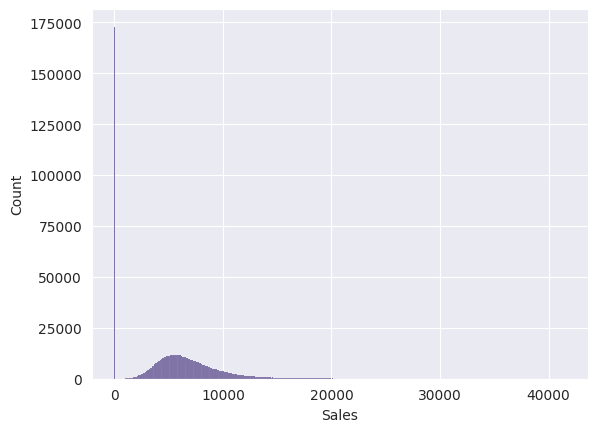

In [21]:
sns.histplot(data=merged_df,x='Sales')

In [22]:
merged_df.Open.value_counts()

,count
Open,
1,844392
0,172817


Since the sales on the day store will be closed wiil be 0 obviously
so we neglect that portion from out training set

In [23]:
merged_df=merged_df[merged_df.Open==1].copy()

<Axes: xlabel='Sales', ylabel='Count'>

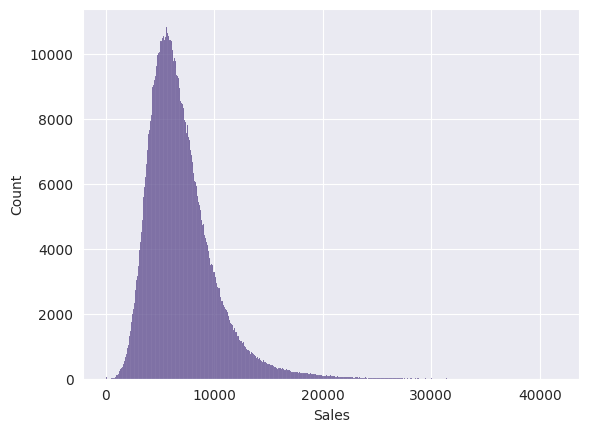

In [24]:
sns.histplot(data=merged_df,x='Sales')

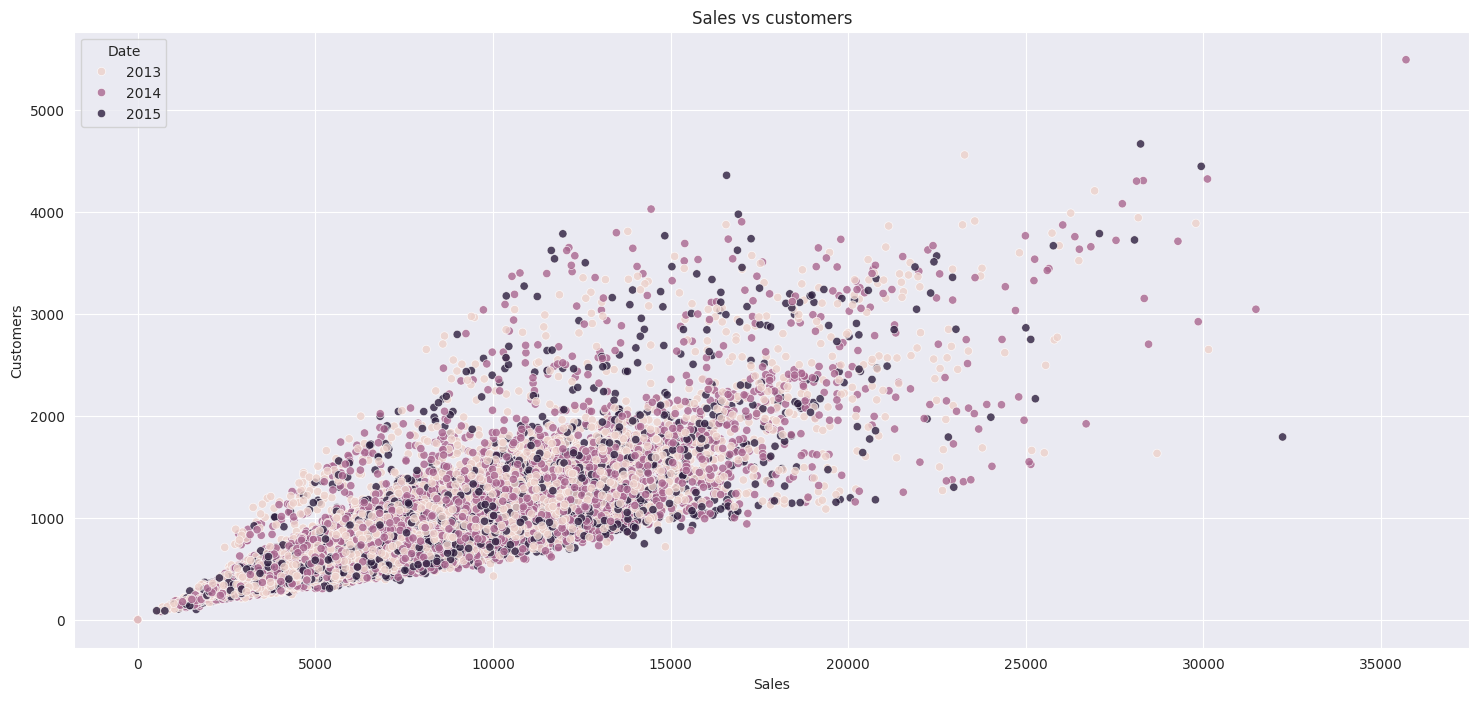

In [25]:
plt.figure(figsize=(18,8))
temp_df=merged_df.sample(40000)
sns.scatterplot(x=temp_df.Sales,y=temp_df.Customers,hue=temp_df.Date.dt.year,alpha=0.8)
plt.title('Sales vs customers')
plt.show()

In [26]:
temp_df=merged_df.sample(40000)
fig=px.scatter(data_frame=temp_df,x='Sales',y='Customers',
               color=temp_df['Date'].dt.year,opacity=0.8,
               title="Sales vs customers")
fig.show()

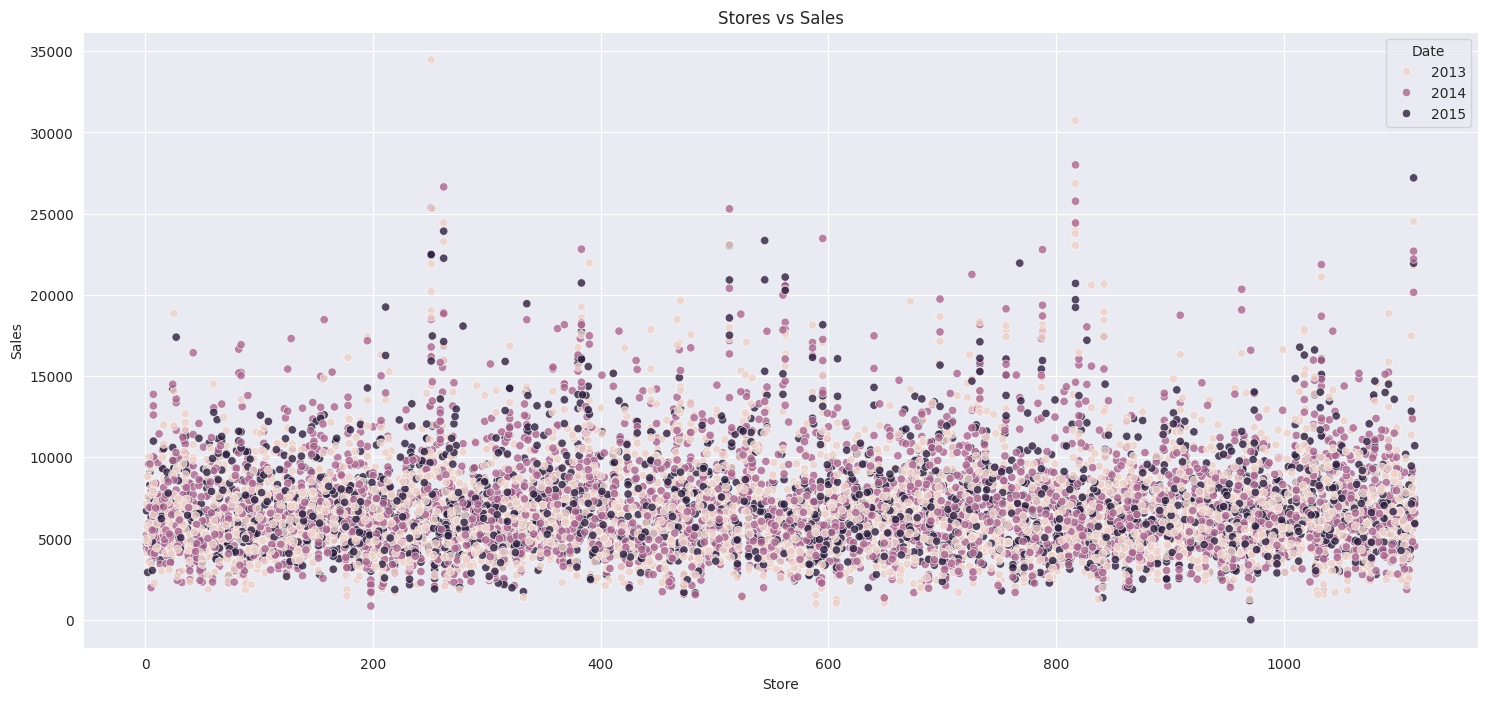

In [27]:
plt.figure(figsize=(18,8))
temp_df=merged_df.sample(10000)
sns.scatterplot(x=temp_df.Store,y=temp_df.Sales,hue=temp_df.Date.dt.year,alpha=0.8)
plt.title('Stores vs Sales')
plt.show()

<Axes: xlabel='DayOfWeek', ylabel='Sales'>

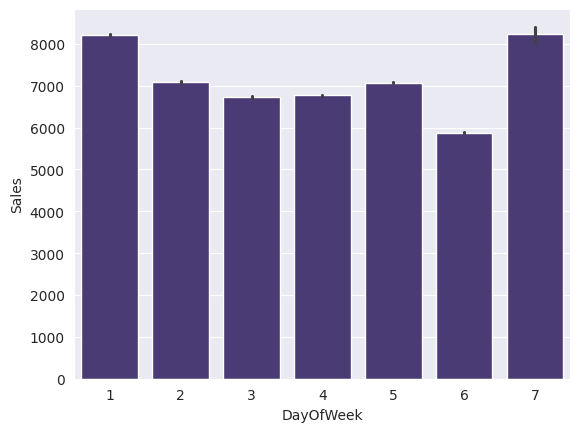

In [28]:
sns.barplot(data=merged_df,x='DayOfWeek',y='Sales')

<Axes: xlabel='Promo', ylabel='Sales'>

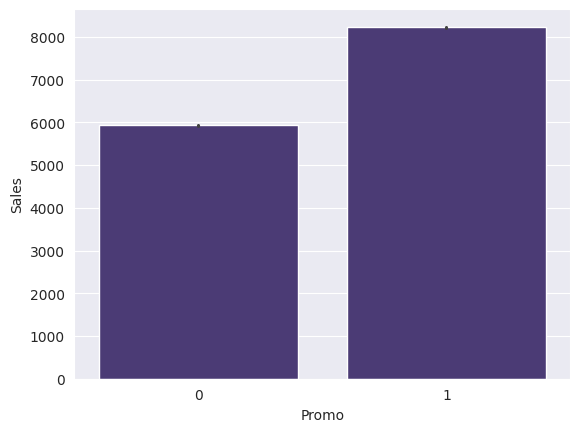

In [29]:
sns.barplot(data=merged_df,x='Promo',y='Sales')

#Feature Engineering (Basic)



In [30]:
merged_df['Day']=merged_df.Date.dt.day
merged_df['Month']=merged_df.Date.dt.month
merged_df['Year']=merged_df.Date.dt.year

In [31]:
merged_test_df['Day']=merged_test_df.Date.dt.day
merged_test_df['Month']=merged_test_df.Date.dt.month
merged_test_df['Year']=merged_test_df.Date.dt.year

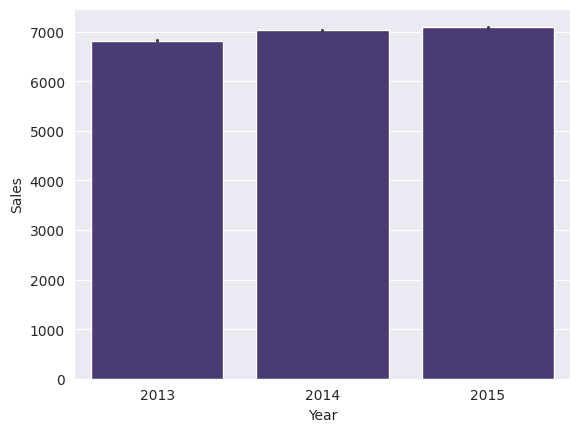

In [32]:
sns.barplot(merged_df,x='Year',y='Sales')
plt.show()

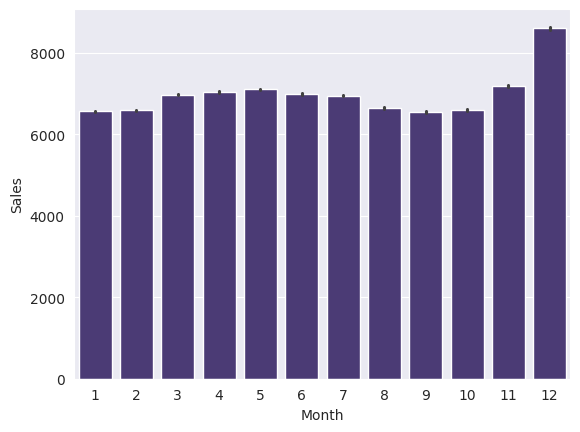

In [33]:
sns.barplot(merged_df,x='Month',y='Sales')
plt.show()

#Feature Engineering V.Imp

#Train Test Split

In [34]:
from sklearn.model_selection import train_test_split

We have sorted the dataset by Date and fetched the first 75% rows for input data and last 25% for validating



In [35]:
sorted_df=merged_df.sort_values(by='Date')
train_size=int(0.75*len(merged_df))
train_df=sorted_df.iloc[:train_size]
val_df=sorted_df.iloc[train_size:]

In [36]:
train_df.Date.min() , train_df.Date.max()

(Timestamp('2013-01-01 00:00:00'), Timestamp('2014-12-10 00:00:00'))

In [37]:
val_df.Date.min(), val_df.Date.max()

(Timestamp('2014-12-10 00:00:00'), Timestamp('2015-07-31 00:00:00'))

In [38]:
merged_test_df.Date.min(), merged_test_df.Date.max()

(Timestamp('2015-08-01 00:00:00'), Timestamp('2015-09-17 00:00:00'))

In [39]:
train_df.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval', 'Day', 'Month', 'Year'],
      dtype='object')

#Input and Target columns

In [40]:
# Define input and target columns
input_cols = ['Store', 'DayOfWeek', 'Promo', 'StateHoliday',
              'StoreType', 'Assortment', 'Day', 'Month', 'Year']
target_col = 'Sales'

In [41]:
train_input=train_df[input_cols].copy()
train_target=train_df[target_col].copy()

In [42]:
val_input=val_df[input_cols].copy()
val_target=val_df[target_col].copy()

In [43]:
test_input=merged_test_df[input_cols].copy()
# test data have no target

Numeric and Categ cols

In [44]:
numeric_cols=train_input.select_dtypes(include=np.number).columns.tolist()
categ_cols=train_input.select_dtypes('object').columns.tolist()

Imputation Scaling Encoding

In [45]:
from sklearn.impute import SimpleImputer

In [46]:
imputer=SimpleImputer(strategy='mean').fit(train_input[numeric_cols])

In [47]:
train_input[numeric_cols]=imputer.transform(train_input[numeric_cols])
val_input[numeric_cols]=imputer.transform(val_input[numeric_cols])
test_input[numeric_cols]=imputer.transform(test_input[numeric_cols])

In [48]:
from sklearn.preprocessing import MinMaxScaler

In [49]:
scaler=MinMaxScaler().fit(train_input[numeric_cols])

In [50]:
numeric_cols

['Store', 'DayOfWeek', 'Promo', 'Day', 'Month', 'Year']

In [51]:
train_input[numeric_cols]=scaler.transform(train_input[numeric_cols])
val_input[numeric_cols]=scaler.transform(val_input[numeric_cols])
test_input[numeric_cols]=scaler.transform(test_input[numeric_cols])

In [52]:
from sklearn.preprocessing import OneHotEncoder

In [53]:
train_input[categ_cols]=train_input[categ_cols].astype(str)

In [54]:
encoder=OneHotEncoder(sparse_output=False,handle_unknown='ignore')
encoder.fit(train_input[categ_cols])
encoder.transform(train_input[categ_cols])
encoded_cols=list(encoder.get_feature_names_out(categ_cols))

In [55]:
train_input[encoded_cols]=encoder.transform(train_input[categ_cols])
val_input[encoded_cols]=encoder.transform(val_input[categ_cols])
test_input[encoded_cols]=encoder.transform(test_input[categ_cols])

In [56]:
X_train=train_input[numeric_cols+encoded_cols]
X_val=val_input[numeric_cols+encoded_cols]
X_test=test_input[numeric_cols+encoded_cols]

#Baseline Models

1. Most Naive approach, just returning the Mean

In [57]:
def return_mean(inputs):
  return np.full(len(inputs),merged_df.Sales.mean())

In [58]:
train_preds=return_mean(X_train)

In [59]:
train_preds

array([6955.51429076, 6955.51429076, 6955.51429076, ..., 6955.51429076,
       6955.51429076, 6955.51429076])

In [60]:
from sklearn.metrics import mean_squared_error

In [61]:
mse=mean_squared_error(train_preds,train_target)

In [62]:
rmse=np.sqrt(mse)
print(rmse)

3082.450443277419


In [63]:
mse=mean_squared_error(return_mean(X_val),val_target)
rsme=np.sqrt(mse)
print(rmse)

3082.450443277419


In [64]:
from sklearn.linear_model import LinearRegression

In [65]:
linerg=LinearRegression()

In [66]:
linerg.fit(X_train,train_target)

LinearRegression()

In [67]:
train_pred=linerg.predict(X_train)
mse=mean_squared_error(train_pred,train_target)
rmse=np.sqrt(mse)
print(rmse)

2770.247954395034


We can clearly see that our BaseLine model is not much better than our model, which always returned the mean.

Now we will be trying other Linear Models, based on their performance we will tune their hyperparameters.

In [68]:
def try_model(model):
  #fit the model
  model.fit(X_train,train_target)
  # Make predictions
  train_pred=model.predict(X_train)
  val_pred=model.predict(X_val)
  #Get the rmse values
  t_mse=mean_squared_error(train_pred,train_target)
  t_rmse=np.sqrt(t_mse)
  v_mse=mean_squared_error(val_pred,val_target)
  v_rmse=np.sqrt(v_mse)
  return t_rmse, v_rmse

In [69]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso, ElasticNet, SGDRegressor

In [70]:
try_model(LinearRegression())

(2770.247954395034, 2845.939818804143)

In [71]:
try_model(Ridge())

(2770.24795819201, 2845.938089926183)

In [72]:
try_model(Lasso())

(2770.3726290482336, 2846.168579224428)

In [73]:
try_model(ElasticNet())

(2934.9886267724014, 3025.359735759683)

In [74]:
try_model(SGDRegressor())

(2770.5999706731245, 2847.6409493758633)

All have pretty bad results,
Now we will try Tree Models

In [75]:
from sklearn.tree import DecisionTreeRegressor, plot_tree

In [76]:
tree=DecisionTreeRegressor(random_state=42)
try_model(tree)

(0.0, 1580.9762029664844)

[Text(0.5, 0.9, 'Promo <= 0.5\nsquared_error = 9494721.741\nsamples = 633294\nvalue = 6873.18'),
 Text(0.25, 0.7, 'StoreType_b <= 0.5\nsquared_error = 6681042.292\nsamples = 352553\nvalue = 5848.377'),
 Text(0.375, 0.8, 'True  '),
 Text(0.125, 0.5, 'Assortment_a <= 0.5\nsquared_error = 6056548.123\nsamples = 345345\nvalue = 5774.691'),
 Text(0.0625, 0.3, 'Store <= 0.999\nsquared_error = 6647602.298\nsamples = 162964\nvalue = 6150.433'),
 Text(0.03125, 0.1, '\n  (...)  \n'),
 Text(0.09375, 0.1, '\n  (...)  \n'),
 Text(0.1875, 0.3, 'Month <= 0.955\nsquared_error = 5289548.402\nsamples = 182381\nvalue = 5438.952'),
 Text(0.15625, 0.1, '\n  (...)  \n'),
 Text(0.21875, 0.1, '\n  (...)  \n'),
 Text(0.375, 0.5, 'Assortment_c <= 0.5\nsquared_error = 23877531.412\nsamples = 7208\nvalue = 9378.778'),
 Text(0.3125, 0.3, 'Store <= 0.24\nsquared_error = 21438783.291\nsamples = 6769\nvalue = 8911.584'),
 Text(0.28125, 0.1, '\n  (...)  \n'),
 Text(0.34375, 0.1, '\n  (...)  \n'),
 Text(0.4375, 0.3, 'D

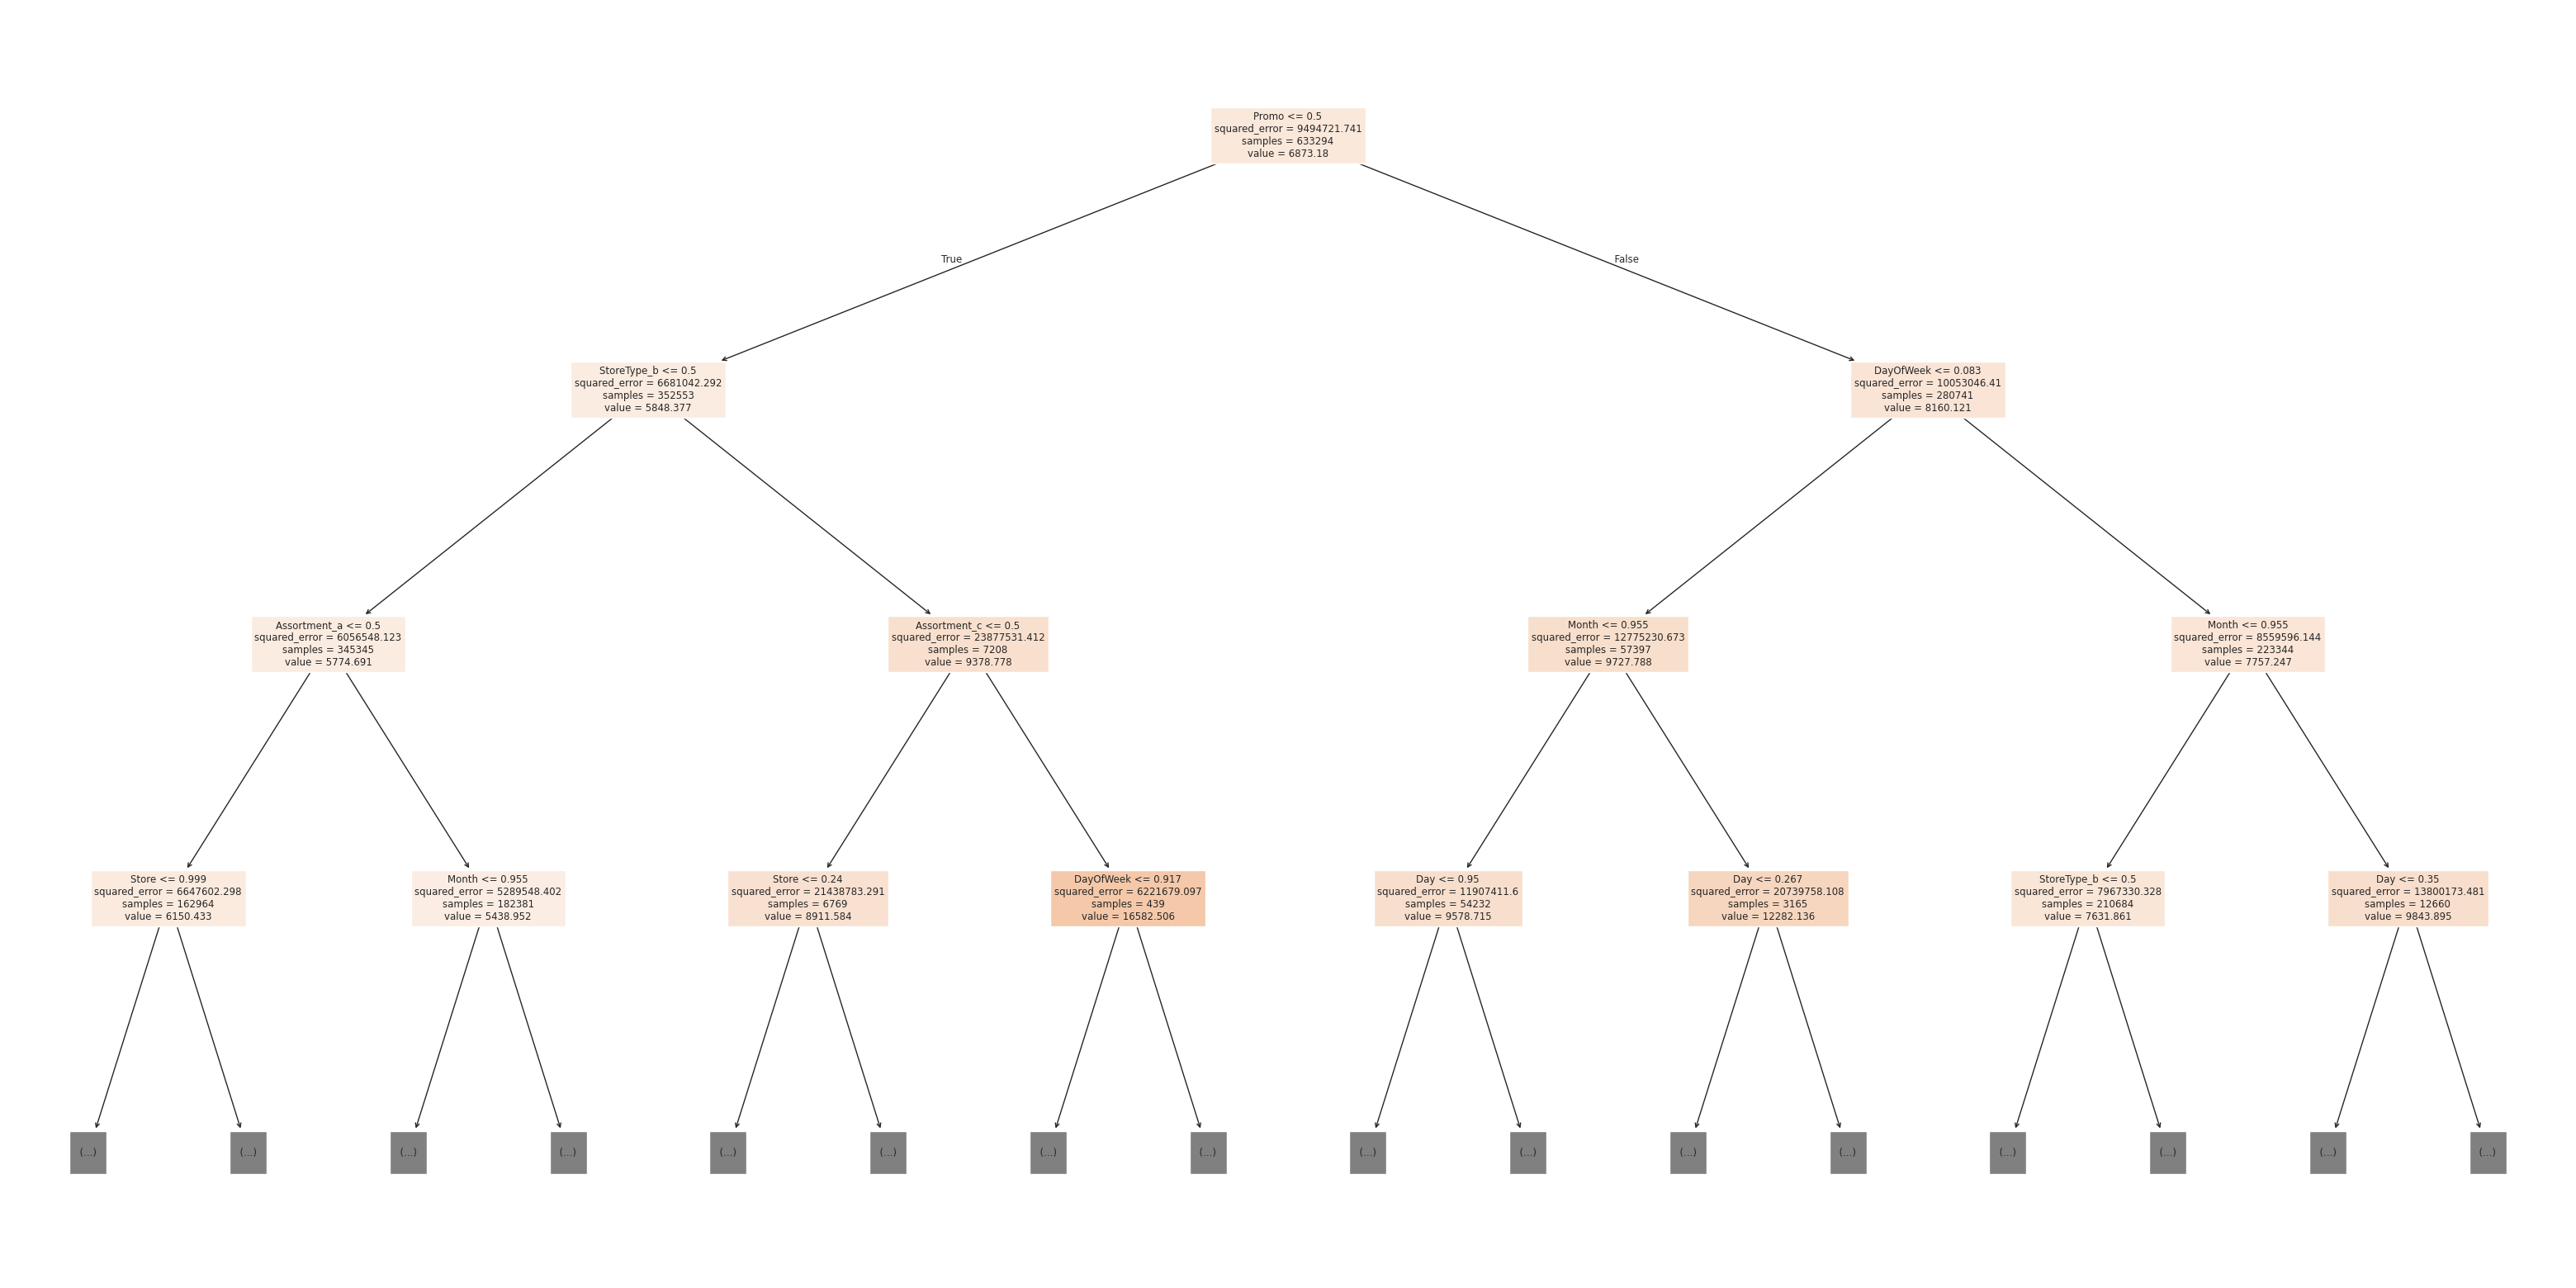

In [77]:
plt.figure(figsize=(40,20))
plot_tree(tree,max_depth=3,filled=True,feature_names=numeric_cols+encoded_cols)

In [78]:
from sklearn.ensemble import RandomForestRegressor

In [79]:
rf=RandomForestRegressor(random_state=42,n_jobs=-1,n_estimators=20)
try_model(rf)

(508.8759831250981, 1393.6695117016016)

Since we are acheiving pretty good results in Tree models
We will try to tune their hyperparameters for better results

In [80]:
from sklearn.model_selection import RandomizedSearchCV

In [81]:
# DecisionTreeRegressor
params={
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}


In [82]:
treemodel=DecisionTreeRegressor(random_state=42)

In [83]:
cv = RandomizedSearchCV(estimator=treemodel, param_distributions=params,n_jobs=-1, cv=3,n_iter=50)
cv.fit(X_train,train_target)

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:317: UserWarning:

The total space of parameters 36 is smaller than n_iter=50. Running 36 iterations. For exhaustive searches, use GridSearchCV.



RandomizedSearchCV(cv=3, estimator=DecisionTreeRegressor(random_state=42),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'max_depth': [None, 10, 20, 30],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10]})

In [84]:
cv.best_score_

0.7542363389972131

In [85]:
model=DecisionTreeRegressor(min_samples_leaf=2, min_samples_split=5, random_state=42)

In [86]:
model.fit(X_train,train_target)

DecisionTreeRegressor(min_samples_leaf=2, min_samples_split=5, random_state=42)

In [87]:
try_model(model)

(723.1726240091771, 1586.2385542379955)

In [88]:
fmodel=RandomForestRegressor(random_state=42,n_jobs=-1,n_estimators=20)
# using this as our final model

In [89]:
fmodel.fit(X_train,train_target)

RandomForestRegressor(n_estimators=20, n_jobs=-1, random_state=42)

In [98]:
X_test

,Store,DayOfWeek,Promo,Day,Month,Year,StateHoliday_0,StateHoliday_a,StateHoliday_b,StateHoliday_c,StoreType_a,StoreType_b,StoreType_c,StoreType_d,Assortment_a,Assortment_b,Assortment_c
0,0.000000,0.500000,1.0,0.533333,0.727273,2.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,0.001795,0.500000,1.0,0.533333,0.727273,2.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.005386,0.500000,1.0,0.533333,0.727273,2.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.006284,0.500000,1.0,0.533333,0.727273,2.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.007181,0.500000,1.0,0.533333,0.727273,2.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41083,0.996409,0.833333,0.0,0.000000,0.636364,2.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
41084,0.997307,0.833333,0.0,0.000000,0.636364,2.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
41085,0.998205,0.833333,0.0,0.000000,0.636364,2.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
41086,0.999102,0.833333,0.0,0.000000,0.636364,2.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [99]:
test_preds=fmodel.predict(X_test)

In [100]:
test_preds

array([ 4272.15,  7783.85,  8778.2 , ...,  5961.85, 20797.25,  6743.4 ])

In [101]:
submisson_df=pd.read_csv('/content/rossmann-store-sales/sample_submission.csv')

In [102]:
submisson_df['Sales']=test_df['Open'].fillna(1).astype('int')*test_preds

In [104]:
submisson_df

,Id,Sales
0,1,4272.15
1,2,7783.85
2,3,8778.20
3,4,6716.45
4,5,6655.40
...,...,...
41083,41084,3079.00
41084,41085,9050.20
41085,41086,5961.85
41086,41087,20797.25


In [106]:
submisson_df.to_csv('submission.csv',index=None)